In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import numpy as np


In [43]:
import pandas as pd

In [4]:
import seaborn as sns

In [178]:
data, target = load_diabetes(as_frame= True, return_X_y=True)
a = 1e-6
alpha_linspace = np.linspace(a, 1, 10)
values = []
for i in range(0,10):
    lm = Lasso(alpha_linspace[i])
    lm.fit(data, target)
    values.append(lm.coef_.tolist())
weights = pd.DataFrame(values, columns=data.columns.to_list())

In [115]:
alphas = pd.DataFrame(alpha_linspace, columns=["alpha"])
alphas

,alpha
0,0.000001
1,0.111112
2,0.222223
3,0.333334
4,0.444445
5,0.555556
6,0.666667
7,0.777778
8,0.888889
9,1.000000


In [157]:
good_table = pd.DataFrame(data.columns.to_list(),columns=["category"])
good_table

,category
0,age
1,sex
2,bmi
3,bp
4,s1
5,s2
6,s3
7,s4
8,s5
9,s6


In [170]:
join_1 = pd.concat([good_table,alphas],axis=1)
join_1

,category,alpha
0,age,0.000001
1,sex,0.111112
2,bmi,0.222223
3,bp,0.333334
4,s1,0.444445
5,s2,0.555556
6,s3,0.666667
7,s4,0.777778
8,s5,0.888889
9,s6,1.000000


In [179]:
weights

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-10.008853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-239.814724,-146.747715,-57.770081,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2,519.846342,516.181298,510.079811,499.134632,480.405341,461.678239,442.951136,420.015882,393.857677,367.703860
3,324.383684,270.606880,224.329641,180.884788,151.297739,121.710163,92.122587,63.174761,34.737833,6.298858
4,-792.103690,-42.126115,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
5,476.683668,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,101.008950,-207.349333,-156.969392,-103.517577,-73.385484,-43.252279,-13.119074,-0.000000,-0.000000,-0.000000
7,177.050620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,751.247755,477.662511,448.166346,433.677245,416.574262,399.470953,382.367644,360.108655,333.857612,307.605418
9,67.626542,29.387337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [176]:
join_2 = pd.concat([good_table, weights.T], axis=1)
join_2

,category,0,1,2,3,4,5,6,7,8,9
0,age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,s2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,s3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,s4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,s5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,s6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
table = pd.concat([weights,alphas],axis=1)
table

,1e-06,0.111112,0.222223,0.33333399999999996,0.444445,0.555556,0.666667,0.7777780000000001,0.888889,1.0,alpha
0,-10.008853,-239.814724,519.846342,324.383684,-792.103690,476.683668,101.008950,177.05062,751.247755,67.626542,0.000001
1,0.000000,-146.747715,516.181298,270.606880,-42.126115,-0.000000,-207.349333,0.00000,477.662511,29.387337,0.111112
2,0.000000,-57.770081,510.079811,224.329641,-0.000000,-0.000000,-156.969392,0.00000,448.166346,0.000000,0.222223
3,0.000000,-0.000000,499.134632,180.884788,-0.000000,-0.000000,-103.517577,0.00000,433.677245,0.000000,0.333334
4,0.000000,-0.000000,480.405341,151.297739,-0.000000,-0.000000,-73.385484,0.00000,416.574262,0.000000,0.444445
5,0.000000,-0.000000,461.678239,121.710163,-0.000000,0.000000,-43.252279,0.00000,399.470953,0.000000,0.555556
6,0.000000,-0.000000,442.951136,92.122587,0.000000,0.000000,-13.119074,0.00000,382.367644,0.000000,0.666667
7,0.000000,-0.000000,420.015882,63.174761,0.000000,0.000000,-0.000000,0.00000,360.108655,0.000000,0.777778
8,0.000000,-0.000000,393.857677,34.737833,0.000000,0.000000,-0.000000,0.00000,333.857612,0.000000,0.888889
9,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.00000,307.605418,0.000000,1.000000


In [139]:
sns.barplot(data = table, x = table.columns[0:-1].to_list(), y=data[0,:], hue='alpha')

InvalidIndexError: (0, slice(None, None, None))

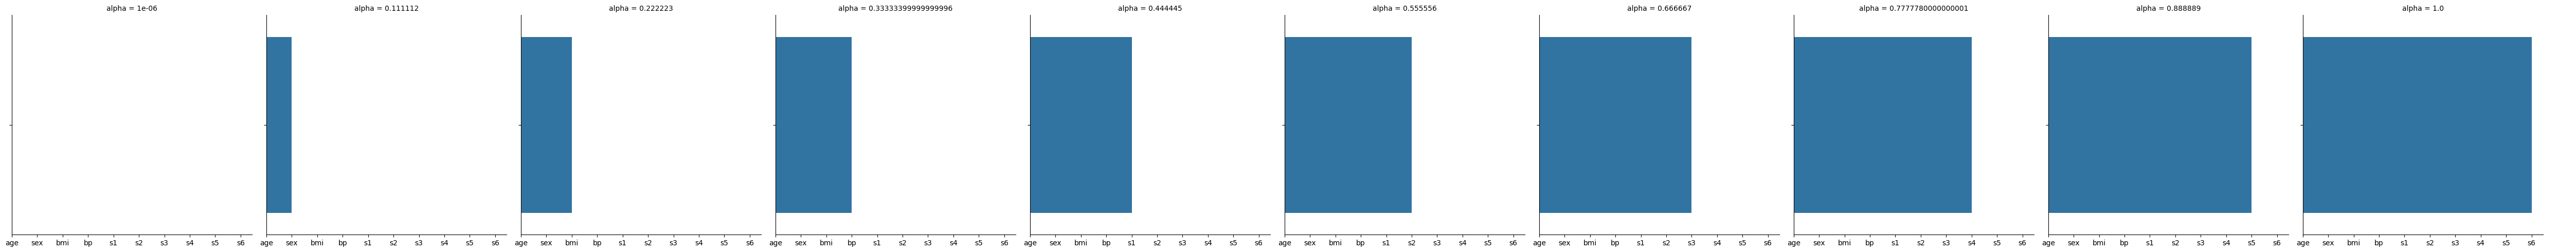

In [137]:
sns.catplot(data = table, kind='bar', x = table.columns[0:-1].to_list(), col='alpha')
